In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Dynamics of random recurrent networks

## Init network connectivity

The zero fixed point is unstable!


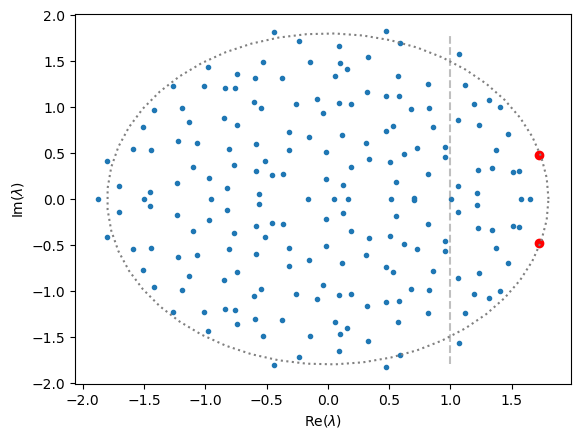

In [25]:
# set size and gain
N = 200
g = 1.8

# generate random coupling matrix
J = g * np.random.randn(N, N) / np.sqrt(N)

# inspect eigenvalues
eigs = np.linalg.eigvals(J)
# get eigenvalue with maximal real part
argmaxeig = np.argmax(np.real(eigs))
maxeig = eigs[argmaxeig]

plt.plot(np.real(eigs), np.imag(eigs), '.');
plt.plot(np.real(maxeig), np.imag(maxeig), 'o', color='red');
plt.plot(np.real(maxeig), -np.imag(maxeig), 'o', color='red');

# draw expected eig border
thetas = np.linspace(0, 2*np.pi, 50)
plt.plot(g * np.cos(thetas), g * np.sin(thetas), ':', color='gray');

plt.vlines(x=1, ymin=-g, ymax=g, ls='--', color='gray', alpha=0.5)

plt.xlabel('Re($\lambda$)');
plt.ylabel('Im($\lambda$)');

# check linear stability
if np.real(maxeig) < 1.:
    print("The zero fixed point is stable.")
else:
    print("The zero fixed point is unstable!")

## Run network dynamics

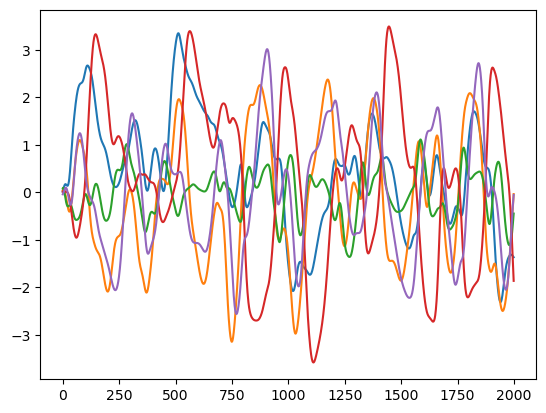

In [26]:
# set total simulation time and integration time-step
T = 2000
dt = 0.1
titot = int(T / dt)

xs = np.empty((titot, N)) # allocate records
x = 0.1 * np.random.randn(N) # set random initial condition
for ti in range(titot):
    h = J @ np.tanh(x) # compute incoming current
    x = (1. - dt) * x + dt * h # update network state
    xs[ti] = x # record network state

# plot activity record
upto = 2000
plt.plot(xs[:upto,:5]);

## Inspect dimensionality of activations: PCA in three different ways

PCA dimensionality estimate: 4.469149240616735


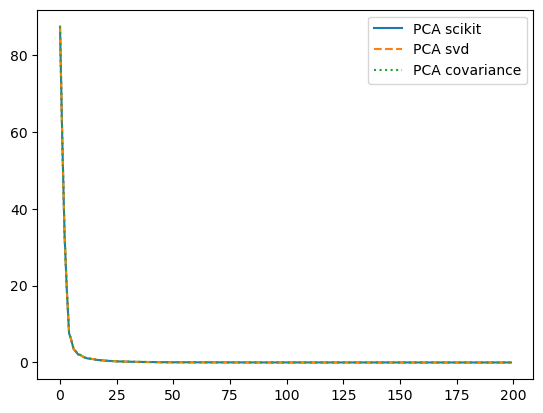

In [29]:
# pca with a little help from your friends: using scikit learn
pca = PCA().fit(xs)
pca_variance_scikit = pca.explained_variance_


# PCA on your own: computing SVD decomposition of data matrix
s = np.linalg.svd(xs, compute_uv=False)
pca_variance_svd = s**2 / len(xs)


# PCA on your own - reprise: eigenvalues of the covariance matrix
C = xs.T @ xs / len(xs)
pca_variance_covariance = np.linalg.eigvalsh(C)[::-1]


# plot the three values and hope the curves are all the same
plt.plot(pca_variance_scikit, '-', label='PCA scikit');
plt.plot(pca_variance_svd, '--', label='PCA svd')
plt.plot(pca_variance_covariance, ':', label='PCA covariance');

plt.legend();

dim_pca = pca_variance_covariance.sum()**2 / (pca_variance_covariance**2).sum()
print("PCA dimensionality estimate:", dim_pca)

# Assignments

1. How does the dimensionality change as a function of the variance $g^2$? Wrap the simulator and the dimensionality analysis in a function and run it for different valus of g...can you reproduce Fig. 4 of https://arxiv.org/abs/2006.02427?

2. What happens to chaotic dynamics when you drive a recurrent network with some inputs? Take inspiration from this classic work https://journals.aps.org/pre/abstract/10.1103/PhysRevE.82.011903 and try to stimulate a network with a sine wave.

3. What happens to chaos in a rate network composed of Excitatory and Inhibitory populations? Can you reproduce Fig. 2 in https://journals.aps.org/prx/abstract/10.1103/PhysRevX.5.041030?